In [63]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from subtle.utils.io import load_file, load_h5_metadata
from subtle.subtle_preprocess import zoom_iso, mask_im
import pydicom
import matplotlib.pyplot as plt

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (15, 12)

def display_dcm(fpath_dcm, vmin=None, vmax=None):
    dcm = pydicom.dcmread(fpath_dcm)
    img = dcm.pixel_array
    print(img.min(), img.max())
    print(img.shape)
    show_img(img, axis=True, vmin=vmin, vmax=vmax)


def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

def show_gad_comparison(img_pre, img_low, img_post, vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 3, 1)
    show_img(img_pre, title='Pre contrast', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 2)
    show_img(img_low, title='10% dosage', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 3)
    show_img(img_post, title='Full dosage', vmin=vmin, vmax=vmax)

    plt.show()

def show_comparison(img1, img2, titles=['', ''], vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 2, 1)
    show_img(img1, title=titles[0], vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 2, 2)
    show_img(img2, title=titles[1], vmin=vmin, vmax=vmax)
    
    plt.show()

<Figure size 1080x864 with 0 Axes>

(336, 3, 512, 512)
0.0 9.578471


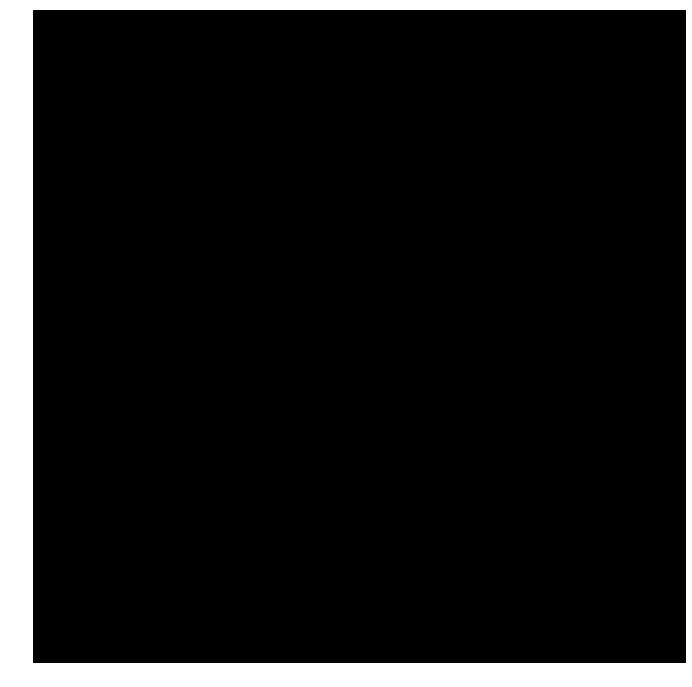

In [8]:
fpath = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data/old/Patient_0101.h5'
data = load_file(fpath)
meta = load_h5_metadata(fpath)

print(data.shape)

data_zero, data_low, data_full = data.transpose(1, 0, 2, 3)
print(data_zero.min(), data_zero.max())
show_img((data_zero < 0)[168])

In [9]:
data_full_iso, new_spacing = zoom_iso(data_full, [1., 0.4688, 0.4688], np.array([1, 1, 1]))

In [10]:
print(data_full_iso.shape)

(336, 240, 240)


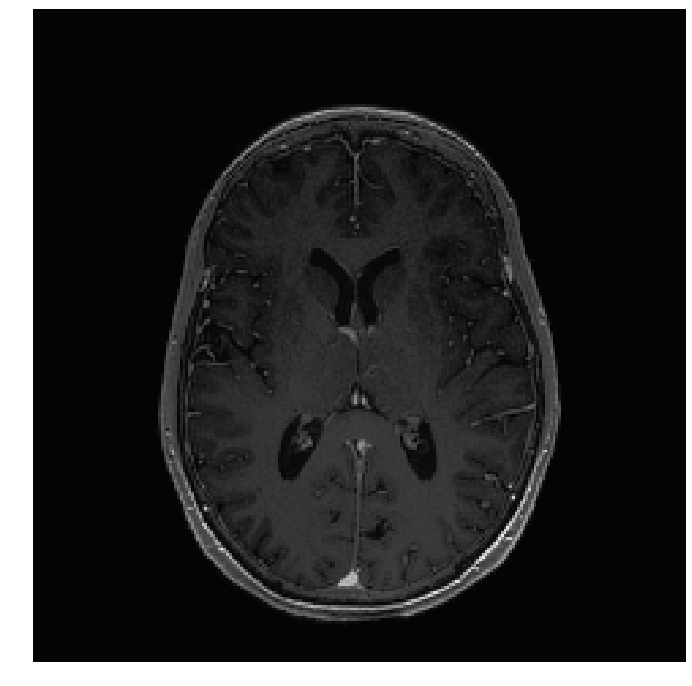

In [11]:
show_img(data_full_iso[168])

In [12]:
data_rev, _ = zoom_iso(data_full_iso, np.array([1, 1, 1]), np.array([1, 0.4688, 0.4688]))
print(data_rev.shape)

(336, 512, 512)


In [13]:
print(data_full.dtype, data_full.min(), data_full.max())
print(data_full_iso.dtype, data_full.min(), data_full.max())
print(data_rev.dtype, data_rev.min(), data_rev.max())

float32 0.0 9.910137
float32 0.0 9.910137
float32 -0.3826034 9.749051


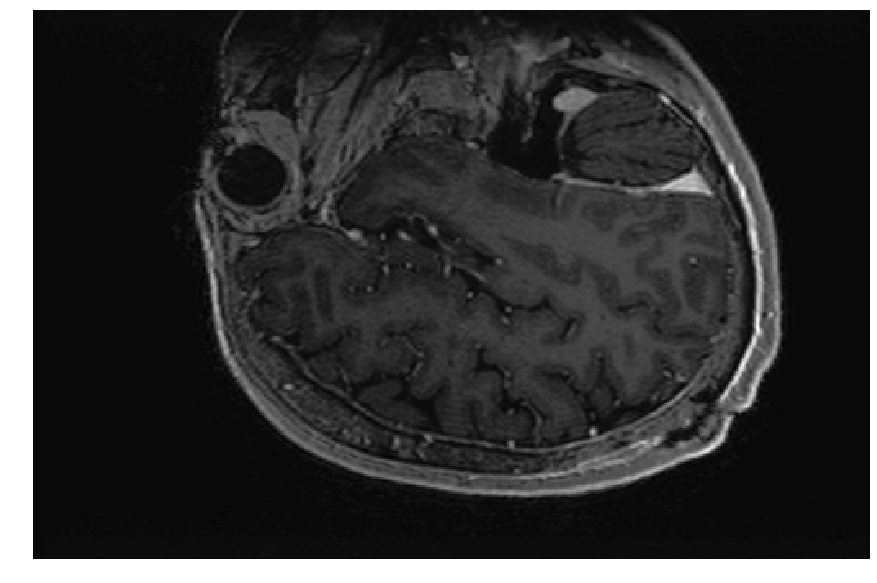

In [14]:
show_img(data_rev[:, :, 168])

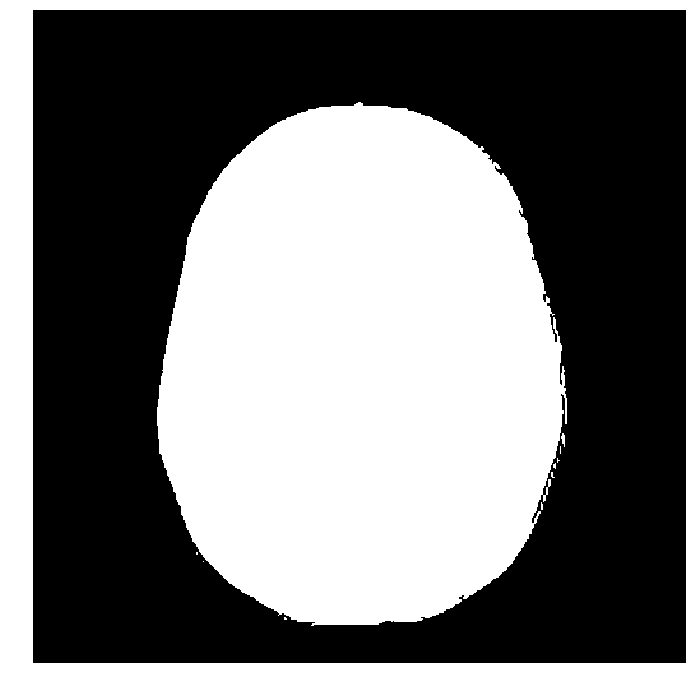

In [86]:
# ypred = np.load('/home/srivathsa/projects/studies/gad/stanford/inference/test/ypred_1_1.npy')

# show_img(ypred[168, ..., 0])

# print(ypred.min(), ypred.max())

inf = np.load('/home/srivathsa/projects/studies/gad/stanford/inference/test/data_out.npy')

inf_mask = mask_im(np.copy(inf).transpose(0, 3, 1, 2))
inf_mask = inf_mask.transpose(0, 2, 3, 1)

inf *= inf_mask

show_img(inf[168, ..., 0], vmin=0, vmax=10)

# inf = np.clip(inf, 0, inf.max())
# print(inf.min(), inf.max())
# show_img(inf[168, ..., 0], vmin=0, vmax=10)

0 7879
(512, 512)


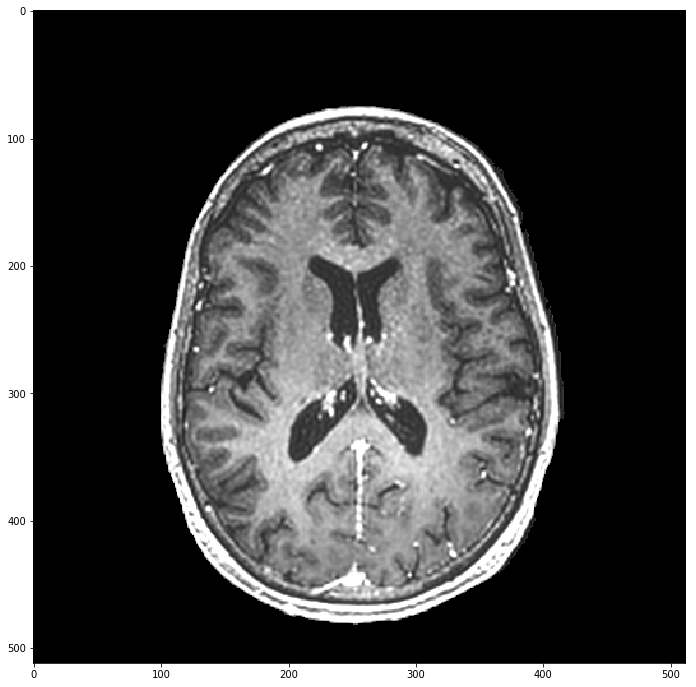

In [123]:
display_dcm(
    '/home/srivathsa/projects/studies/gad/stanford/data/178452_2d22c3/Patient_0101/Patient_0101_SubtleGad/180.dcm',
    vmin=0, vmax=4000
)